In [1]:
import os
import re
import spacy

import pandas as pd

from tqdm import tqdm
from spacy.language import Language
from spacy_langdetect import LanguageDetector

In [2]:
Language.factory("language_detector", func=lambda nlp, name: LanguageDetector())
nlp = spacy.load('en_core_web_trf')
nlp.add_pipe('language_detector', last=True)

/Users/faustogerman/miniforge3/envs/CodeNetSentinel/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
problems_data = {
    "pid": [],
    "original": [],
    "clean": [],
    "lang": [],
}

def do_clean(inp):
    txt = inp.replace("<pre>", "```").replace("</pre>", "```") # Replace `pre` tags with triple backticks
    txt = re.sub(f"<(?:\"[^\"]*\"['\"]*|'[^']*'['\"]*|[^'\">])+>", "  ", txt) # Remove all HTML tags
    txt = re.sub("(\n\s*\n)", "\n\n", txt) # Remove consecutive newlines
    txt = re.sub("( {2,})", " ", txt).strip() # Remove consecutive spaces
    txt = re.sub("^[\s\t]+", "\n", txt, flags=re.MULTILINE)
    return txt


for meta in tqdm(os.listdir("./mini_codenet/problem_descriptions/")):
    pid = meta[:-5]
    
    with open("./mini_codenet/problem_descriptions/"+meta, "r") as submission_contents:
        problem_desc_html = submission_contents.read()
        cleaned = do_clean(problem_desc_html)
        
        problems_data["pid"].append(pid)
        problems_data["original"].append(problem_desc_html)
        problems_data["clean"].append(cleaned)
        problems_data["lang"].append(nlp(cleaned)._.language["language"])

  0%|          | 0/3999 [00:00<?, ?it/s]

100%|██████████| 3999/3999 [20:02<00:00,  3.33it/s]


In [4]:
problems = pd.DataFrame(problems_data)
del problems_data

problems

,pid,original,clean,lang
0,p03466,"<span class=""lang-en"">\n<p>Score : <var>1100</...",Score : 1100 points \n\nProblem Statement Let ...,en
1,p03036,"<span class=""lang-en"">\n<p>Score : <var>200</v...",Score : 200 points \n\nProblem Statement The d...,en
2,p02277,"\n<H1>Quick Sort</H1>\n<!--\n<p style=""color:#...",Quick Sort \n\nPlease note that problem descri...,en
3,p03935,"<span class=""lang-en lang-child hidden-lang"">\...",Max Score: $1400$ Points \n\nProblem Statement...,en
4,p01908,"\n\n\n<script type=""text/x-mathjax-config"">\nM...",MathJax.Hub.Config({\ntex2jax: {inlineMath: [[...,ja
...,...,...,...,...
3994,p02126,<h1>Problem C: Ball</h1>\n\n<h2>Problem</h2>\n...,Problem C: Ball \n\nProblem \n\n$N$個のボールがあり、各ボ...,ja
3995,p03367,"<span class=""lang-en"">\n<p>Score : <var>1700</...",Score : 1700 points \n\nProblem Statement Snuk...,en
3996,p02825,"<span class=""lang-en"">\n<p>Score : <var>900</v...",Score : 900 points \n\nProblem Statement Let u...,en
3997,p00818,"\n<H1><font color=""#000"">Problem H:</font> Viv...",Problem H: Viva Confetti \n\nDo you know confe...,en


<Axes: >

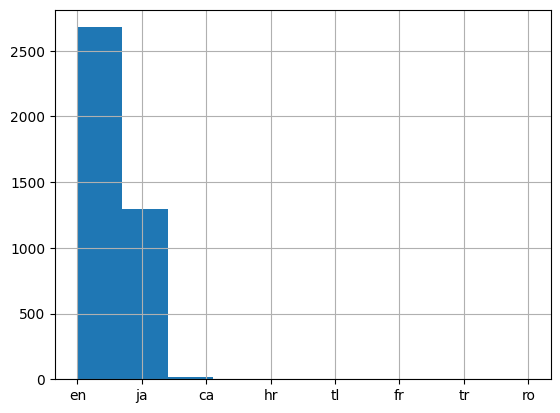

In [5]:
problems["lang"].hist()

In [6]:
problems.to_feather("./mini_codenet/problem_descriptions.ftr")